# Data Visualizations:
## Alphabetical Guide to the Wines of Washington (Wine Spectator, Sep 2020)
### Geographic Visualizations on Summary Statistics
### Red Blend

### File Setup

In [19]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

# import os, shutil for file navigation
import os
import shutil
import glob

# import other packages
import geopandas as gpd

In [20]:
# initialize visualization set
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

# Jupyter Notebook
%matplotlib inline

### Data Frame Import

In [21]:
df_wines = pd.read_csv('./Alphabetical Guide to Washington.csv')
df_wines.shape

(418, 9)

In [22]:
df_wines.sample(10)

,ID,Winery,Wine,Score,Price,Grape_Blend,AVA,Vineyard,Year
229,230,LUJON,Syrah Walla Walla Valley 2017,87,25.0,Syrah,Walla Walla Valley,NaN,2017.0
85,86,CHATEAU STE. MICHELLE,Chardonnay Columbia Valley 2017,89,11.0,Chardonnay,Columbia Valley,NaN,2017.0
79,80,CEDAR + SALMON,Cabernet Sauvignon Horse Heaven Hills 2016,84,25.0,Cabernet Sauvignon,Horse Heaven Hills,NaN,2016.0
364,365,SPARKMAN,Wilderness Columbia Valley 2017,90,25.0,Red Blend,Columbia Valley,NaN,2017.0
410,411,WINES OF SUBSTANCE,Bx Vineyard Collection Substance Klein Vineyar...,89,70.0,Red Bordeaux Blend,Walla Walla Valley,Klein Vineyard,2015.0
174,175,JANUIK,Merlot Columbia Valley 2016,90,25.0,Merlot,Columbia Valley,NaN,2016.0
231,232,LUKE,Chardonnay Ancient Lakes Of Columbia Valley 2018,90,22.0,Chardonnay,Ancient Lakes of Columbia Valley,NaN,2018.0
329,330,SEVEN HILLS,Merlot Walla Walla Valley 2017,87,25.0,Merlot,Walla Walla Valley,NaN,2017.0
214,215,L'ECOLE NO. 41,Syrah Columbia Valley 2017,87,25.0,Syrah,Columbia Valley,NaN,2017.0
197,198,KIRKLAND SIGNATURE,Cabernet Sauvignon Columbia Valley 2017,84,9.0,Cabernet Sauvignon,Columbia Valley,NaN,2017.0


### Summary Statistics by AVA across all Grapes and Blends

In [23]:
# What is the average score by AVA in the Alphabetical Guide to Washington?

df_score_by_ava = df_wines[['AVA', 'Score']].groupby('AVA').mean()

df_score_by_ava

,Score
AVA,
Ancient Lakes of Columbia Valley,90.000000
Columbia Valley,88.490099
Horse Heaven Hills,88.159091
Lake Chelan,89.000000
Red Mountain,90.478261
Royal Slope,90.285714
Snipes Mountain,90.000000
Wahluke Slope,89.000000
Walla Walla Valley,90.416667


In [24]:
# What is the average price by AVA in the Alphabetical Guide to Washington?

df_price_by_ava = df_wines[['AVA', 'Price']].groupby('AVA').mean()

df_price_by_ava

,Price
AVA,
Ancient Lakes of Columbia Valley,22.000000
Columbia Valley,31.040000
Horse Heaven Hills,26.545455
Lake Chelan,35.000000
Red Mountain,57.543478
Royal Slope,95.000000
Snipes Mountain,70.000000
Wahluke Slope,29.500000
Walla Walla Valley,49.166667


### Summary Statistics by AVA for six best represented Grapes and Blends

In [25]:
# What is the average score by grape or blend by AVA in the Alphabetical Guide to Washington?

df_cabsauv     = df_wines[(df_wines.Grape_Blend == 'Cabernet Sauvignon')]
df_syrah       = df_wines[(df_wines.Grape_Blend == 'Syrah')]
df_redblend    = df_wines[(df_wines.Grape_Blend == 'Red Blend')]
df_redbordeaux = df_wines[(df_wines.Grape_Blend == 'Red Bordeaux Blend')]
df_chardonnay  = df_wines[(df_wines.Grape_Blend == 'Chardonnay')]
df_merlot      = df_wines[(df_wines.Grape_Blend == 'Merlot')]

df_syrah.sample(5)

,ID,Winery,Wine,Score,Price,Grape_Blend,AVA,Vineyard,Year
185,186,K,Syrah Wahluke Slope The Hidden Northridge Vine...,92,70.0,Syrah,Wahluke Slope,Northridge Vineyard,2016.0
186,187,K,Syrah Walla Walla Valley Phil Lane Vineyard 2016,91,70.0,Syrah,Walla Walla Valley,Phil Lane Vineyard,2016.0
311,312,REYNVAAN,Syrah Walla Walla Valley Stonessence 2017,94,110.0,Syrah,Walla Walla Valley,NaN,2017.0
191,192,K,Syrah Washington Skull Stoneridge Vineyard 2016,90,140.0,Syrah,Royal Slope,Stoneridge Vineyard,2016.0
391,392,WARR-KING,Syrah Columbia Valley 2016,88,36.0,Syrah,Columbia Valley,NaN,2016.0


In [26]:
# Data for map visualization: Cabernet Sauvignon

df_cabsauv_count = df_cabsauv.groupby('AVA')['Grape_Blend'].count()
df_cabsauv_score = df_cabsauv.groupby('AVA')['Score'].mean()
df_cabsauv_price = df_cabsauv.groupby('AVA')['Price'].mean()

# Data for map visualization: Syrah

df_syrah_count = df_syrah.groupby('AVA')['Grape_Blend'].count()
df_syrah_score = df_syrah.groupby('AVA')['Score'].mean()
df_syrah_price = df_syrah.groupby('AVA')['Price'].mean()

# Data for map visualization: Red Blend

df_redblend_count = df_redblend.groupby('AVA')['Grape_Blend'].count()
df_redblend_score = df_redblend.groupby('AVA')['Score'].mean()
df_redblend_price = df_redblend.groupby('AVA')['Price'].mean()

# Data for map visualization: Red Bordeaux Blend

df_redbordeaux_count = df_redbordeaux.groupby('AVA')['Grape_Blend'].count()
df_redbordeaux_score = df_redbordeaux.groupby('AVA')['Score'].mean()
df_redbordeaux_price = df_redbordeaux.groupby('AVA')['Price'].mean()

# Data for map visualization: Chardonnay

df_chardonnay_count = df_chardonnay.groupby('AVA')['Grape_Blend'].count()
df_chardonnay_score = df_chardonnay.groupby('AVA')['Score'].mean()
df_chardonnay_price = df_chardonnay.groupby('AVA')['Price'].mean()

# Data for map visualization: Merlot

df_merlot_count = df_merlot.groupby('AVA')['Grape_Blend'].count()
df_merlot_score = df_merlot.groupby('AVA')['Score'].mean()
df_merlot_price = df_merlot.groupby('AVA')['Price'].mean()

## Geographic Processing

See *Geographic Visualization* notebook for details on shapefile processing. This notebook uses the concatenated shapefile result of that process. 

### Open Vector Maps

In [27]:
shp_path = './ava_all/ava_shapefiles.shp'
sf = shp.Reader(shp_path)

In [28]:
# Number of records (shapes) in concatenated shape file. Here, numbers of AVA polygons.
len(sf.shapes())

16

In [29]:
# Explore one shapefile record.
sf.records()[1]

Record #1: [255, 'Royal Slope', 0, 0.0, 'Washington', '', '2', 'None', 'Columbia Valley', 1599004800000, 'Established', '27 CFR 9.271', 'None', '', 'Adams, Grant', 0.074763210199762, 1.97896346427747, 'F']

### Convert shapefiles into a Pandas dataframe

In [30]:
# Convert the shapefile into a Pandas dataframe
def read_shapefile(sf):
    # read a shapefile into a Pandas dataframe with a 'coords' column holding the geometry information.
    # this uses the pyshp package.
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    
    return df

In [31]:
# Present shapefile as dataframe.

df = read_shapefile(sf)
df

,OBJECTID,Name,Id,Area,States,Phase,Level_,Contains_,Within,Establishe,Status,CFR_Sectio,Partially_,Note,Counties,Shape_Area,Shape_Leng,selected,coords
0,216,Columbia Gorge,0,621.896085,"Oregon, Washington",Phase XIV,1,None,None,1084147200000,Established,27 CFR 9.178,None,,"OR: Hood River, Wasco; WA: Klickitat, Skamania",0.090822,1.933248,F,"[(-121.627176804498, 45.7056269235344), (-121...."
1,255,Royal Slope,0,0.000000,Washington,,2,None,Columbia Valley,1599004800000,Established,27 CFR 9.271,None,,"Adams, Grant",0.074763,1.978963,F,"[(-119.980283566903, 46.9857319279403), (-119...."
2,67,Walla Walla Valley,0,1035.582049,"Oregon, Washington",Phase VI,2,The Rocks District of Milton-Freewater,Columbia Valley,444873600000,Established,27 CFR 9.91,None,,OR: Umatilla; WA: Walla Walla,0.150226,4.155462,F,"[(-118.752240225833, 46.0650273989079), (-118...."
3,226,Ancient Lakes of Columbia Valley,0,570.568421,Washington,Phase XIX,2,None,Columbia Valley,1350518400000,Established,27 CFR 9.227,None,,"Douglas, Grant, Kittitas",0.081130,1.382728,F,"[(-120.095377980367, 47.2456320777975), (-120...."
4,227,Lake Chelan,0,111.898347,Washington,Phase XVIII,2,None,Columbia Valley,1232496000000,Established,27 CFR 9.215,None,,Chelan,0.015688,0.885637,F,"[(-119.9743709105, 47.8474480947289), (-119.97..."
5,162,Lewis-Clark Valley,0,1008.773304,"Idaho, Washington",Phase XXI,1,None,None,1461110400000,Established,27 CFR 9.256,None,,"ID: Clearwater, Latah; WA: Asotin, Garfield, W...",0.145407,16.491167,F,"[(-117.229203855546, 46.4239508801636), (-117...."
6,144,Red Mountain,0,14.916350,Washington,Phase XIII,3,None,"Columbia Valley, Yakima Valley",986860800000,Established,27 CFR 9.167,None,,Benton,0.002154,0.244601,F,"[(-119.438392430228, 46.2619092390181), (-119...."
7,220,Horse Heaven Hills,0,1860.765196,Washington,Phase XV,2,None,Columbia Valley,1120176000000,Established,27 CFR 9.188,None,,"Benton, Klickitat, Yakima",0.270045,4.658133,F,"[(-119.706752055188, 46.2047744716618), (-119...."
8,66,Columbia Valley,0,38088.772849,"Oregon, Washington",Phase V,1,"Ancient Lakes of Columbia Valley, Candy Mounta...",None,469152000000,Established,27 CFR 9.74,None,,"OR: Gilliman, Morrow, Sherman, Umatilla, Wasc...",5.477803,38.302919,F,"[(-117.229203855546, 46.4239508801636), (-117...."
9,219,Rattlesnake Hills,0,245.157935,Washington,Phase XVI,3,None,"Columbia Valley, Yakima Valley",1140220800000,Established,27 CFR 9.193,None,,Yakima,0.035303,1.207129,F,"[(-120.465387337277, 46.520589754441), (-120.4..."


### Create Heat Maps
See *Geographic Visualization* notebook for additional exploration of shapefiles

In [32]:
# Create a function to separate the source data into bins. Color code those bins.

def calc_color(data, color=None):
    if color   == 1: color_sq = ['#ffccff', '#e0a3e0', '#c27ac2', '#a352a3', '#852985', '#660066']; colors = 'Purples';
    elif color == 2: color_sq = ['#ffcccc', '#ebada3', '#d68f7a', '#c27052', '#ad5229', '#993300']; colors = 'Reds';
    elif color == 3: color_sq = ['#ffff00', '#ebd600', '#d6ad00', '#c28500', '#ad5c00', '#993300']; colors = 'YlOrRd';
    elif color == 4: color_sq = ['#99ccff', '#7aa3e0', '#5c7ac2', '#3d52a3', '#1f2985', '#000066']; colors = 'Blues';
    elif color == 5: color_sq = ['#993333', '#8f293d', '#851f47', '#7a1452', '#700a5c', '#660066']; colors = 'RdPu';
    elif color == 9: color_sq = ['#99ccff', '#7aa3e0', '#5c7ac2', '#3d52a3', '#1f2985', '#000066']; colors = 'Blues';
    else:            color_sq = ['#993333', '#8f293d', '#851f47', '#7a1452', '#700a5c', '#660066']; colors = 'RdPu';
    new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
    color_ton = []
    for val in new_data:
        color_ton.append(color_sq[val])
    if color != 9:
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.6);
        for i in range(6):
            print('\n' + str(i+1) + ': ' + str(int(bins[i])) + ' => ' + str(int(bins[i+1]) -1), end = ' ')
        print('\n\n   1   2   3   4   5   6')
    return color_ton, bins;

In [33]:
# Plot map with specific AVAs, using specific color

def plot_ava_data(sf, title, avas, data=None, color=None, print_id=False):
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    ava_id = []
    for i in avas:
        ava_id.append(df[df.Name == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, ava_id, print_id, 
                                     color_ton, bins, 
                                     x_lim=None, y_lim=None, figsize=(7, 7));

In [34]:
# Plot map with lim coordinates

def plot_map_fill_multiples_ids_tone(sf, title, ava, print_id,
                                    color_ton, bins,
                                    x_lim=None, y_lim=None, figsize=(7, 7)):
    
    # plot area and set axes
    plt.figure(figsize = figsize)
    
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')

        for id in ava:
            shape_ex = sf.shape(id)
            
            # initialize an array of rows and columns with 0 in place of each element
            # array: number of rows = len(shape_ex, point), number of columns = 1
            x_lon = np.zeros((len(shape_ex.points), 1))
            y_lat = np.zeros((len(shape_ex.points), 1))
            for ip in range(len(shape_ex.points)):
                x_lon[ip] = shape_ex.points[ip][0]
                y_lat[ip] = shape_ex.points[ip][1]
            ax.fill(x_lon, y_lat, color_ton[ava.index(id)])
            if print_id != False:
                x0 = np.mean(x_lon)
                y0 = np.mean(y_lat)
                plt.text(x0, y0, id, fontsize=10)

        if (x_lim != None) & (y_lim != None):
            plt.xlim(x_lim)
            plt.ylim(y_lim)

### Map visualization: Red Blend


1: 87 => 86 
2: 87 => 87 
3: 88 => 87 
4: 88 => 87 
5: 88 => 87 
6: 88 => 88 

   1   2   3   4   5   6


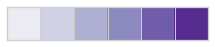

<Figure size 504x504 with 0 Axes>

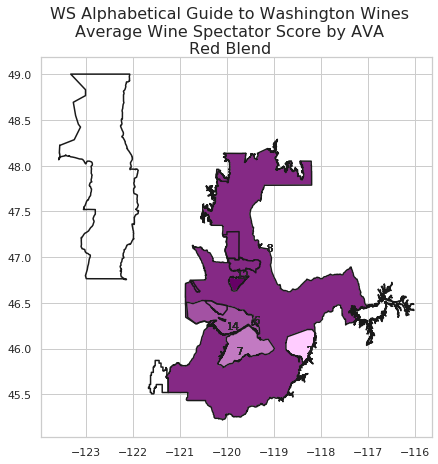

In [35]:
# df_redblend_count, df_redblend_score, df_redblend_price

title = 'WS Alphabetical Guide to Washington Wines\nAverage Wine Spectator Score by AVA\nRed Blend'
data = df_redblend_score
names = df_redblend_score.index.values

plot_ava_data(sf, title, names, data, 1, True)


1: 21 => 28 
2: 29 => 29 
3: 30 => 30 
4: 31 => 33 
5: 34 => 39 
6: 40 => 43 

   1   2   3   4   5   6


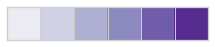

<Figure size 504x504 with 0 Axes>

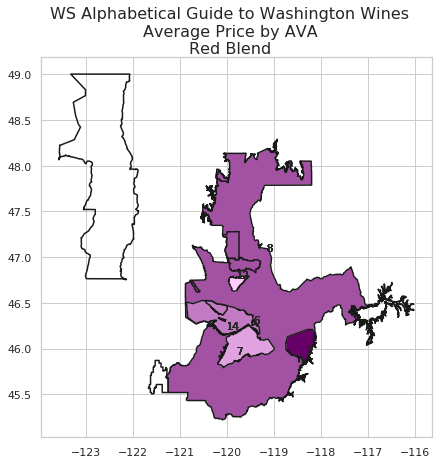

In [36]:
# df_redblend_count, df_redblend_score, df_redblend_price

title = 'WS Alphabetical Guide to Washington Wines\nAverage Price by AVA\nRed Blend'
data = df_redblend_price
names = df_redblend_price.index.values

plot_ava_data(sf, title, names, data, 1, True)